In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from altair import Chart, X, Y, Axis, Scale, Color, Legend

In [2]:
df = pd.read_csv("../data/double_hybrid_bucket_basic_circuits.csv")

In [ ]:
df.columns

In [ ]:
np.unique(df['n'])

In [ ]:
df[np.logical_and(df['name'] == 'LargeWidthSmallDepth', df['n'] == 36)]['distill_distances']

In [ ]:
grouped = df.groupby(by=['name', 'n'])

In [ ]:
df[np.logical_and(df['n'] == 36, df['k'] == 0)][['n', 'q','name','total_time','total_phys_q']]

In [ ]:
df[np.logical_and(df['n'] == 15, df['k'] == 0)][['n', 'q','name','total_time','total_phys_q']]

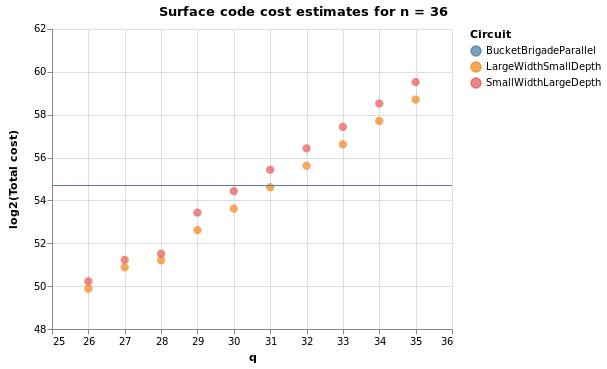

In [4]:
# Space vs. time tradeoff
ldw = df[np.logical_or(df['name'] == 'LargeWidthSmallDepth', df['name'] == 'SmallWidthLargeDepth')]
ldw = ldw[ldw['n'] == 36]

bb = df[df['name'] == 'BucketBrigadeParallel']
bb = bb[bb['n'] == 36]

title = "Surface code cost estimates for n = 36"

points = Chart(ldw, title=title).mark_circle(size=70).encode(
                              x=X('q',
                                  scale=Scale(domain=[25,36]),
                                  axis=Axis(title="q")),
                              y=Y('total_cost',
                                  scale=Scale(domain=[48,62]),
                                  axis=Axis(title="log2(Total cost)")),
                              color=Color('name', legend=Legend(title="Circuit")))

rules = Chart(bb).mark_rule().encode(y='total_cost', 
                              shape='name', color=Color('name', legend=Legend(title="Circuit")))

points + rules


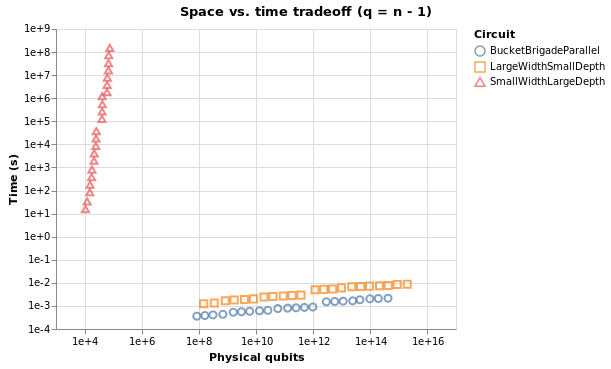

In [3]:
# Space vs. time tradeoff
bb = df[[df['name'][i][0:6] != "Double" and df['name'][i][0:6] != "Hybrid" for i in range(df.shape[0])]]
bb = bb[np.logical_or(bb['name'] == 'BucketBrigadeParallel', bb['q'] == bb['n'] - 1)]
#bb = df[np.logical_or(df['name'] == "BucketBrigade", np.logical_or(df['name'] == "BucketBrigadeParallel", df['q'] == df['n'] - 1))]

Chart(bb, name="space_v_time_basic_bucket", title="Space vs. time tradeoff (q = n - 1)").mark_point(size=50).encode(x=X('total_phys_q',
                                  scale=Scale(type='log', domain=[1e3,1e17]),
                                  axis=Axis(title="Physical qubits", 
                                            format="e", tickCount= 6)),
                              y=Y('total_time',
                                  scale=Scale(type='log'),
                                  axis=Axis(title="Time (s)",
                                            format="e")),
                               shape='name',                                                                                     
                              color=Color('name', legend=Legend(title="Circuit"))
                              )